In [1]:
# archivo de visualización
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos procesados
banco_analizado = pd.read_csv('banco_analizado.csv')
cliente_analizado = pd.read_csv('cliente_analizado.csv') 
datos_combinados = pd.read_csv('datos_combinados.csv')

# Reconvertir fechas
banco_analizado['date'] = pd.to_datetime(banco_analizado['date'])
datos_combinados['Dt_Customer'] = pd.to_datetime(datos_combinados['Dt_Customer'])

print("Datos cargados para visualización")

banco_analizado = pd.read_csv('banco_analizado.csv')
cliente_analizado = pd.read_csv('cliente_analizado.csv') 
datos_combinados = pd.read_csv('datos_combinados.csv')

# Reconvertir fechas
banco_analizado['date'] = pd.to_datetime(banco_analizado['date'])
datos_combinados['Dt_Customer'] = pd.to_datetime(datos_combinados['Dt_Customer'])

print("Datos cargados para visualización")

Datos cargados para visualización
Datos cargados para visualización


In [2]:
# crear copias
banco_visual = banco_analizado.copy()
cliente_visual = cliente_analizado.copy()
datos_combinados_visual = datos_combinados.copy()
print(f"Copias creadas:")
print(f"  banco_visual: {banco_visual.shape}")
print(f"  cliente_visual: {cliente_visual.shape}")
print(f"  datos_combinados_visual: {datos_combinados_visual.shape}")


Copias creadas:
  banco_visual: (43000, 32)
  cliente_visual: (20115, 6)
  datos_combinados_visual: (20018, 40)


In [3]:
# PASO 2: CALCULAR LOS KPIs BÁSICOS
print("\nPaso 2: Calculando los números importantes...")

total_clientes = len(banco_visual)
suscripciones = banco_visual['exito'].sum()
tasa_conversion = (suscripciones / total_clientes) * 100
tiempo_promedio_general = banco_visual['duracion_min'].mean()
tiempo_promedio_exitosos = banco_visual[banco_visual['y'] == 'yes']['duracion_min'].mean()

print(f"📞 Total de llamadas: {total_clientes}")
print(f"✅ Clientes que dijeron SÍ: {suscripciones}")
print(f"📊 Porcentaje de éxito: {tasa_conversion:.1f}%")
print(f"⏰ Tiempo promedio general: {tiempo_promedio_general:.1f} minutos")
print(f"🎯 Tiempo promedio llamadas exitosas: {tiempo_promedio_exitosos:.1f} minutos")


Paso 2: Calculando los números importantes...
📞 Total de llamadas: 43000
✅ Clientes que dijeron SÍ: 4844
📊 Porcentaje de éxito: 11.3%
⏰ Tiempo promedio general: 4.3 minutos
🎯 Tiempo promedio llamadas exitosas: 9.2 minutos



Paso 3: Creando el primer gráfico...


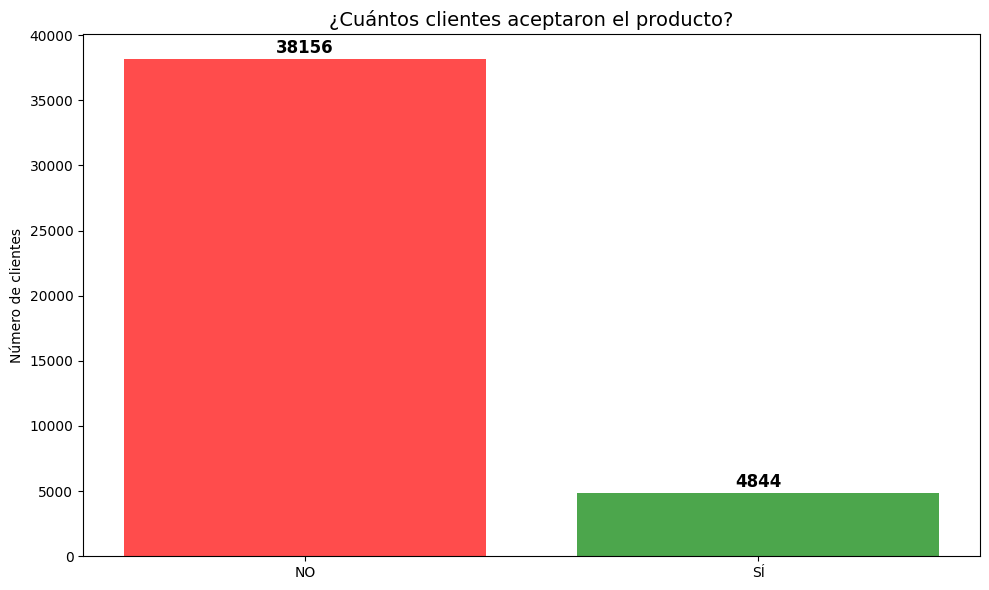

In [4]:
# PASO 3: PRIMER GRÁFICO 
print("\nPaso 3: Creando el primer gráfico...")

plt.figure(figsize=(10, 6))

# Contamos cuántos dijeron sí y cuántos no
resultados = banco_visual['y'].value_counts()

# Crear gráfico de barras simple
plt.bar(['NO', 'SÍ'], resultados.values, color=['red', 'green'], alpha=0.7)
plt.title('¿Cuántos clientes aceptaron el producto?', fontsize=14)
plt.ylabel('Número de clientes')

# Añadir los números encima de las barras
for i, valor in enumerate(resultados.values):
    plt.text(i, valor + 500, str(valor), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Paso 4: Analizando las edades...


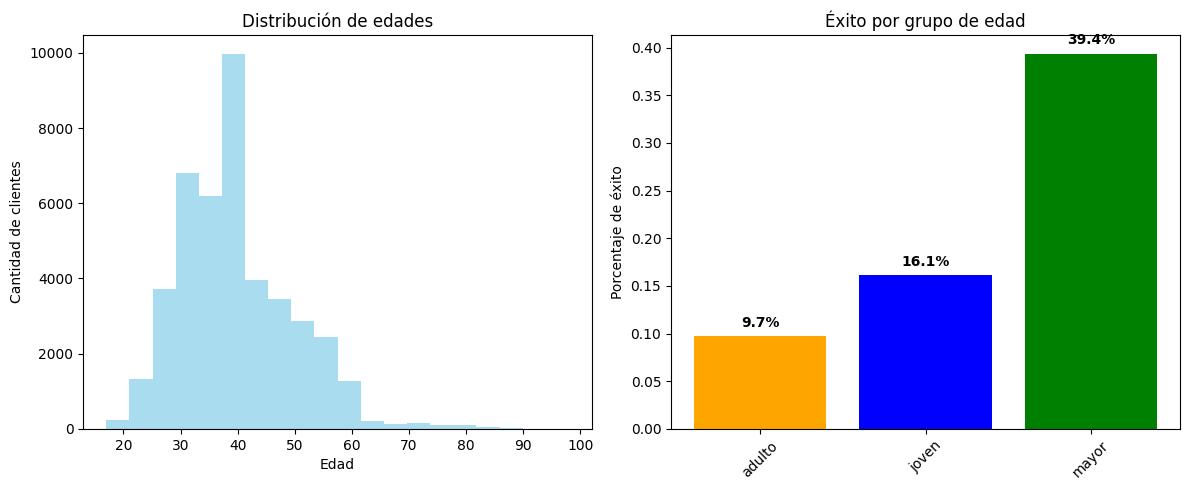

In [5]:
# PASO 4: GRÁFICO DE EDAD 
print("\nPaso 4: Analizando las edades...")

plt.figure(figsize=(12, 5))

# Dividir en dos gráficos lado a lado
plt.subplot(1, 2, 1)

# Histograma de edades
plt.hist(banco_visual['age'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Cantidad de clientes')

plt.subplot(1, 2, 2)

# Éxito por grupo de edad
exito_por_edad = banco_visual.groupby('edad_grupo')['exito'].mean()
plt.bar(exito_por_edad.index, exito_por_edad.values, color=['orange', 'blue', 'green'])
plt.title('Éxito por grupo de edad')
plt.ylabel('Porcentaje de éxito')
plt.xticks(rotation=45)

# Añadir porcentajes
for i, valor in enumerate(exito_por_edad.values):
    plt.text(i, valor + 0.01, f'{valor:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Paso 5: Analizando el tiempo de llamadas...


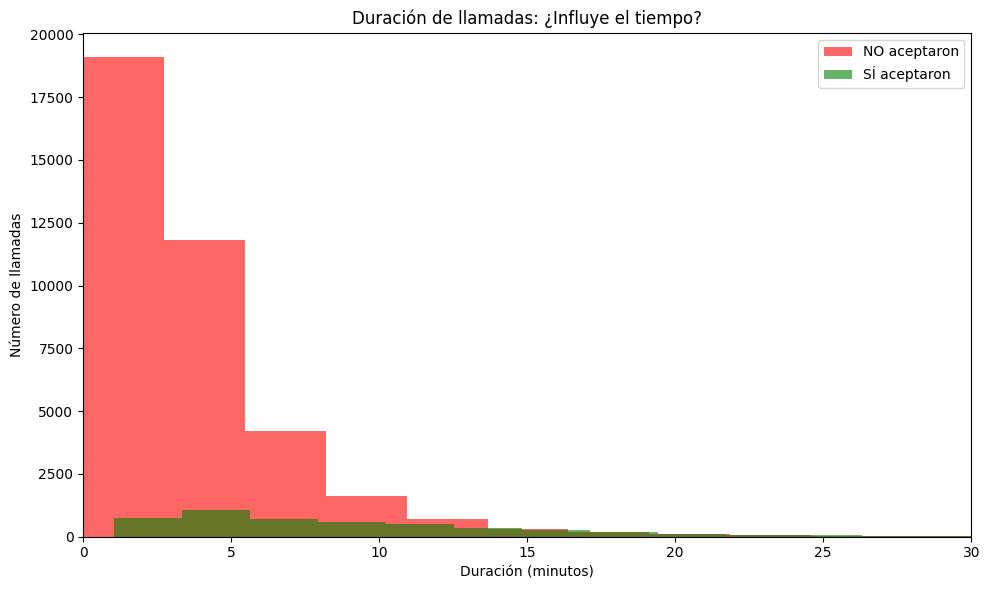

In [7]:
# PASO 5: DURACIÓN DE LLAMADAS
print("\nPaso 5: Analizando el tiempo de llamadas...")

plt.figure(figsize=(10, 6))

# Separar los que dijeron sí y no
exitosos = banco_visual[banco_visual['y'] == 'yes']['duracion_min']
no_exitosos = banco_visual[banco_visual['y'] == 'no']['duracion_min']

# Crear histograma comparativo
plt.hist(no_exitosos, bins=30, alpha=0.6, label='NO aceptaron', color='red')
plt.hist(exitosos, bins=30, alpha=0.6, label='SÍ aceptaron', color='green')

plt.title('Duración de llamadas: ¿Influye el tiempo?')
plt.xlabel('Duración (minutos)')
plt.ylabel('Número de llamadas')
plt.legend()
plt.xlim(0, 30)  # Limitamos para ver mejor

plt.tight_layout()
plt.show()



Paso 6: ¿Qué trabajos tienen más éxito?


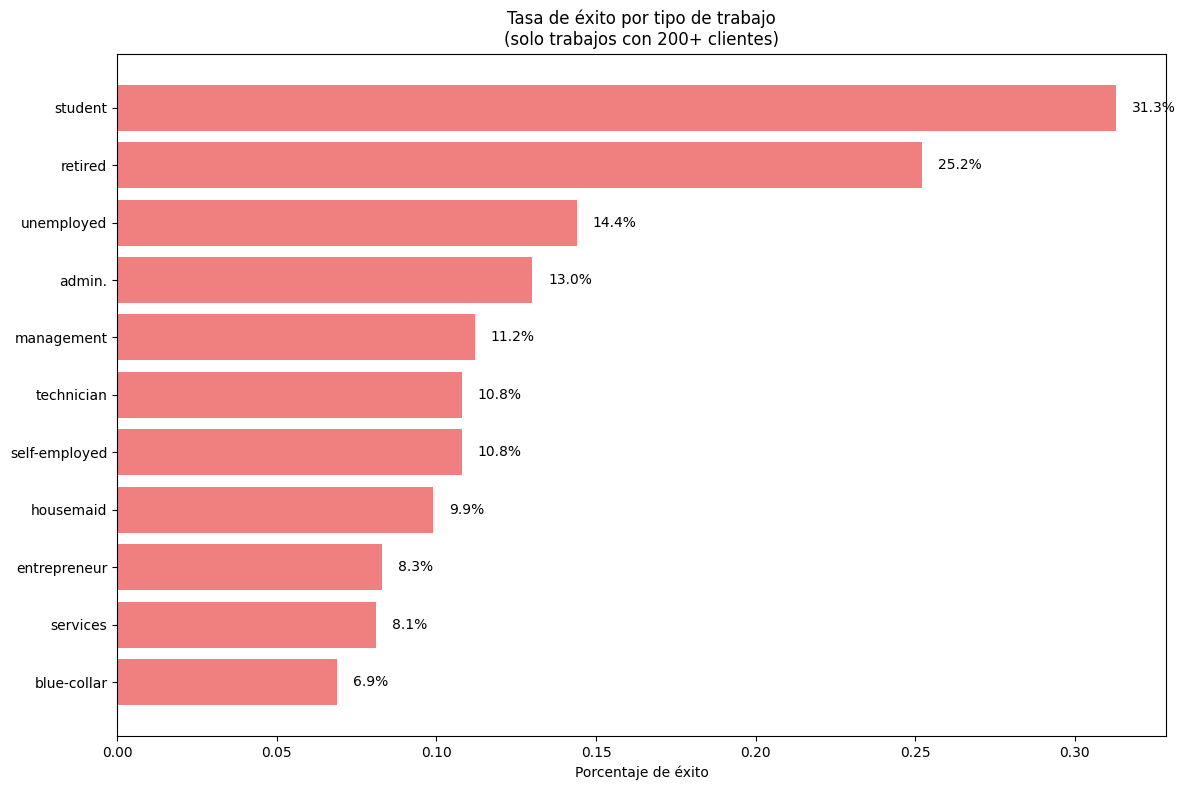

In [8]:
# PASO 6: TRABAJOS MÁS EXITOSOS
print("\nPaso 6: ¿Qué trabajos tienen más éxito?")

plt.figure(figsize=(12, 8))

# Calcular éxito por trabajo
exito_trabajo = banco_visual.groupby('job').agg({
    'exito': ['mean', 'count']
}).round(3)
exito_trabajo.columns = ['tasa_exito', 'total']
exito_trabajo = exito_trabajo.reset_index()

# Filtrar trabajos con al menos 200 clientes (para que sea significativo)
exito_trabajo = exito_trabajo[exito_trabajo['total'] >= 200]
exito_trabajo = exito_trabajo.sort_values('tasa_exito', ascending=True)

# Gráfico horizontal (más fácil de leer)
plt.barh(exito_trabajo['job'], exito_trabajo['tasa_exito'], color='lightcoral')
plt.title('Tasa de éxito por tipo de trabajo\n(solo trabajos con 200+ clientes)')
plt.xlabel('Porcentaje de éxito')

# Añadir los porcentajes
for i, valor in enumerate(exito_trabajo['tasa_exito']):
    plt.text(valor + 0.005, i, f'{valor:.1%}', va='center')

plt.tight_layout()
plt.show()


Paso 7: ¿Hay meses mejores que otros?


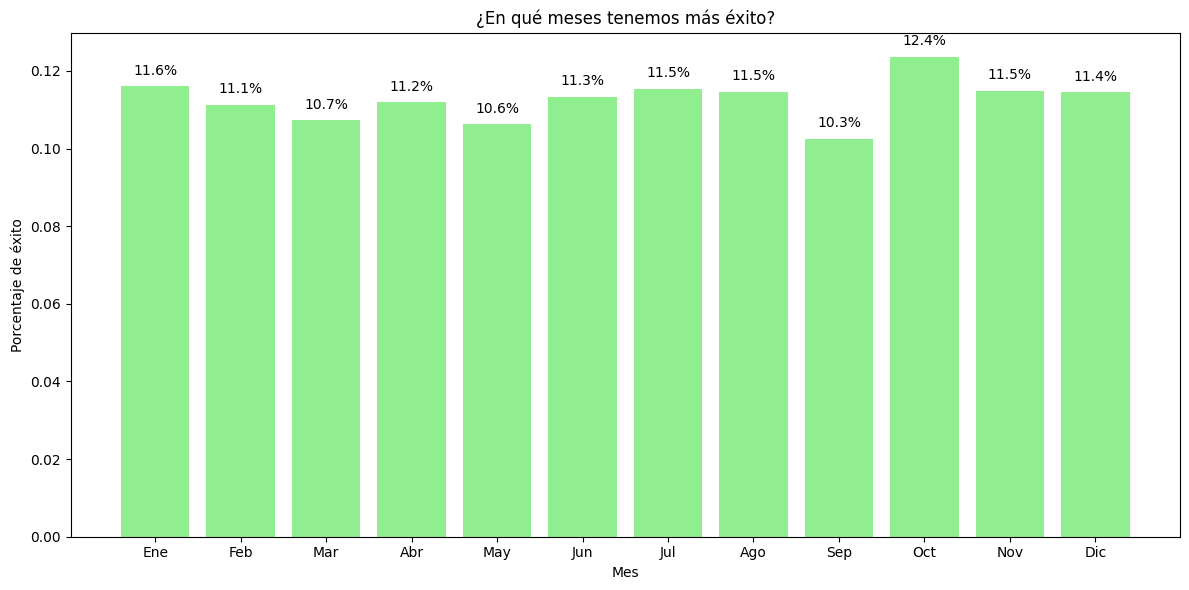

In [9]:
# PASO 7: ANÁLISIS TEMPORAL
print("\nPaso 7: ¿Hay meses mejores que otros?")

plt.figure(figsize=(12, 6))

# Crear lista de nombres de meses
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Calcular éxito por mes
exito_mes = banco_visual.groupby('mes')['exito'].mean()

plt.bar(range(1, 13), exito_mes.values, color='lightgreen')
plt.title('¿En qué meses tenemos más éxito?')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de éxito')
plt.xticks(range(1, 13), meses_nombres)

# Añadir porcentajes
for i, valor in enumerate(exito_mes.values):
    plt.text(i + 1, valor + 0.003, f'{valor:.1%}', ha='center')

plt.tight_layout()
plt.show()


Paso 8: Analizando ingresos de clientes...


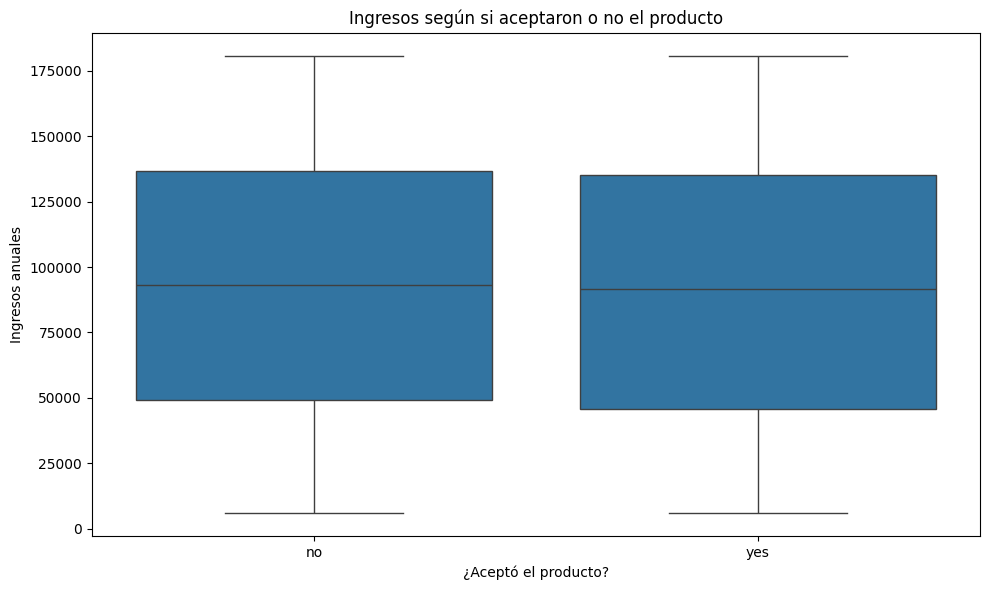

In [10]:
# PASO 8: ANÁLISIS DE INGRESOS (datos combinados)
if 'Income' in datos_combinados_visual.columns:
    print("\nPaso 8: Analizando ingresos de clientes...")
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot de ingresos por resultado
    sns.boxplot(data=datos_combinados_visual, x='y', y='Income')
    plt.title('Ingresos según si aceptaron o no el producto')
    plt.ylabel('Ingresos anuales')
    plt.xlabel('¿Aceptó el producto?')
    
    plt.tight_layout()
    plt.show()


Paso 9: Visualizando las correlaciones principales...
🧓 Analizando el factor EDAD...


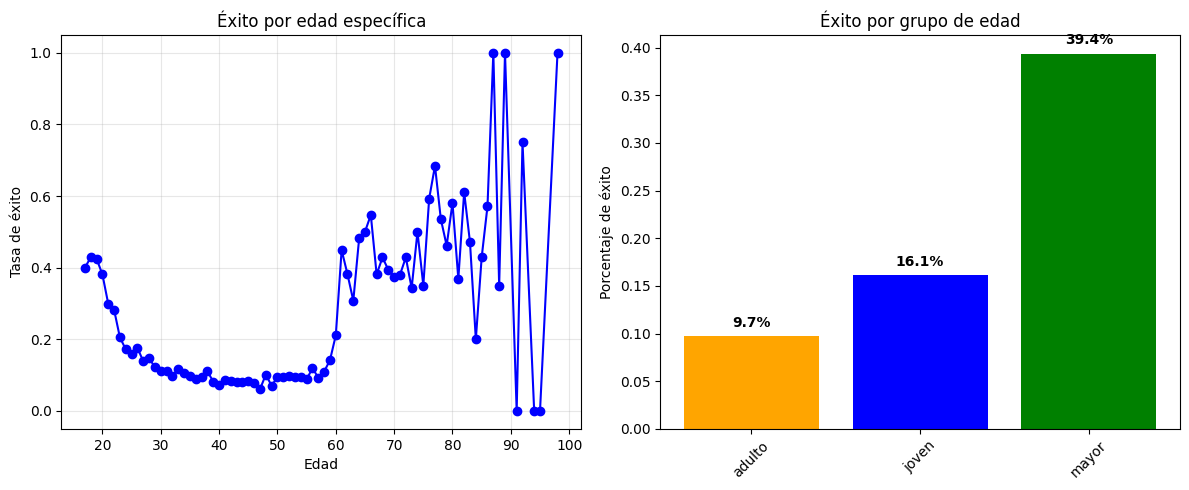

In [ ]:
# PASO 9: CORRELACIONES IMPORTANTES 
print("\nPaso 9: Visualizando las correlaciones principales...")

# CORRELACIÓN 1: PERSONAS MAYORES
print("🧓 Analizando el factor EDAD...")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Éxito por edad específica
exito_por_edad_detalle = banco_visual.groupby('age')['exito'].mean()
plt.plot(exito_por_edad_detalle.index, exito_por_edad_detalle.values, 'o-', color='blue')
plt.title('Éxito por edad específica')
plt.xlabel('Edad')
plt.ylabel('Tasa de éxito')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Éxito por grupo de edad
exito_por_edad_grupo = banco_visual.groupby('edad_grupo')['exito'].mean()
plt.bar(exito_por_edad_grupo.index, exito_por_edad_grupo.values, color=['orange', 'blue', 'green'])
plt.title('Éxito por grupo de edad')
plt.ylabel('Porcentaje de éxito')
plt.xticks(rotation=45)

# Añadir porcentajes
for i, valor in enumerate(exito_por_edad_grupo.values):
    plt.text(i, valor + 0.01, f'{valor:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

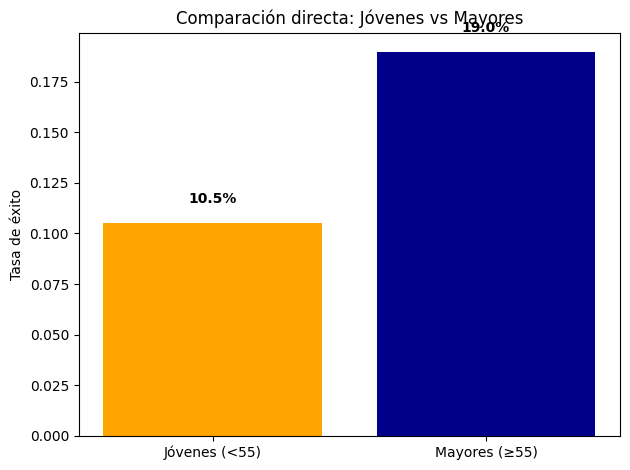

In [12]:
# Comparar mayores vs jóvenes
mayores = banco_visual[banco_visual['age'] >= 55]
jovenes = banco_visual[banco_visual['age'] < 55]

datos_edad = ['Jóvenes (<55)', 'Mayores (≥55)']
tasas_edad = [jovenes['exito'].mean(), mayores['exito'].mean()]

plt.bar(datos_edad, tasas_edad, color=['orange', 'darkblue'])
plt.title('Comparación directa: Jóvenes vs Mayores')
plt.ylabel('Tasa de éxito')

for i, valor in enumerate(tasas_edad):
    plt.text(i, valor + 0.01, f'{valor:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



🎓 Analizando el factor ESTUDIANTES...
Estudiantes en el dataset: 903
Éxito estudiantes: 31.3%
Éxito no estudiantes: 10.8%


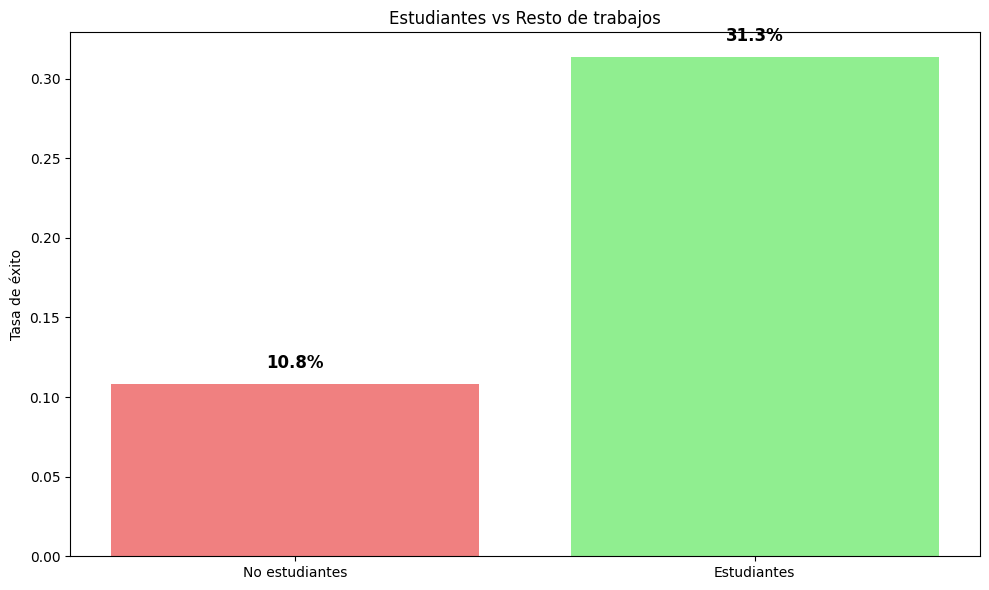

In [13]:
# CORRELACIÓN 2: ESTUDIANTES
print("\n🎓 Analizando el factor ESTUDIANTES...")

plt.figure(figsize=(10, 6))

# Filtrar solo estudiantes
estudiantes = banco_visual[banco_visual['job'] == 'student']
no_estudiantes = banco_visual[banco_visual['job'] != 'student']

print(f"Estudiantes en el dataset: {len(estudiantes)}")
print(f"Éxito estudiantes: {estudiantes['exito'].mean():.1%}")
print(f"Éxito no estudiantes: {no_estudiantes['exito'].mean():.1%}")

# Gráfico comparativo
categorias = ['No estudiantes', 'Estudiantes']
tasas = [no_estudiantes['exito'].mean(), estudiantes['exito'].mean()]

plt.bar(categorias, tasas, color=['lightcoral', 'lightgreen'])
plt.title('Estudiantes vs Resto de trabajos')
plt.ylabel('Tasa de éxito')

for i, valor in enumerate(tasas):
    plt.text(i, valor + 0.01, f'{valor:.1%}', ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()



📞 Analizando CAMPAÑAS ANTERIORES...


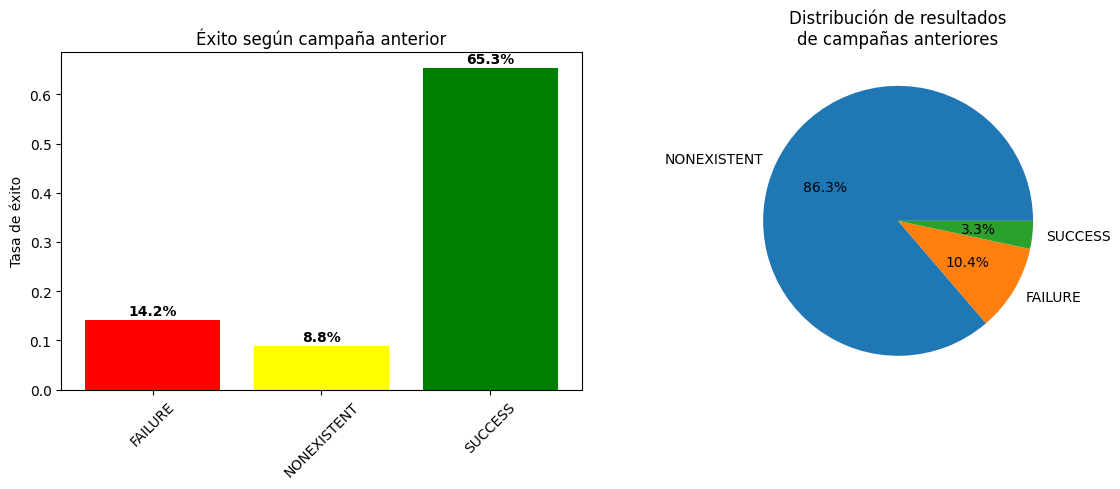

In [14]:
# CORRELACIÓN 3: CAMPAÑAS ANTERIORES
print("\n📞 Analizando CAMPAÑAS ANTERIORES...")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Éxito según resultado de campaña anterior
exito_anterior = banco_visual.groupby('poutcome')['exito'].mean()

plt.bar(exito_anterior.index, exito_anterior.values, 
        color=['red', 'yellow', 'green'])
plt.title('Éxito según campaña anterior')
plt.ylabel('Tasa de éxito')
plt.xticks(rotation=45)

for i, valor in enumerate(exito_anterior.values):
    plt.text(i, valor + 0.01, f'{valor:.1%}', ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
# Conteo de cada tipo de resultado anterior
conteo_anterior = banco_visual['poutcome'].value_counts()

plt.pie(conteo_anterior.values, labels=conteo_anterior.index, autopct='%1.1f%%')
plt.title('Distribución de resultados\nde campañas anteriores')

plt.tight_layout()
plt.show()

In [31]:
# PASO 11: ANÁLISIS ESPECÍFICO DE COMBINACIONES
print("\nPaso 11: Análisis de combinaciones específicas...")
print("ℹ️ Usando banco_visual para tener todos los registros")

# Primero, veamos qué valores tiene poutcome
print("🔍 Valores únicos en 'poutcome':")
print(banco_visual['poutcome'].value_counts())

# COMBINACIÓN 1: Campañas anteriores exitosas + Mayor de edad
print("\n🎯 COMBINACIÓN 1: Éxito anterior + Mayor (55+)")

# Verificar cuántos tienen éxito anterior
exito_anterior = banco_visual[banco_visual['poutcome'] == 'SUCCESS']
print(f"Total con éxito anterior: {len(exito_anterior)}")

# Verificar cuántos son mayores
mayores = banco_visual[banco_visual['age'] >= 55]
print(f"Total mayores de 55: {len(mayores)}")

# Ahora la combinación
exito_anterior_mayor = banco_visual[
    (banco_visual['poutcome'] == 'SUCCESS') & 
    (banco_visual['age'] >= 55)
]

total_exito_anterior_mayor = len(exito_anterior_mayor)
exitos_combinacion_1 = exito_anterior_mayor['exito'].sum() if total_exito_anterior_mayor > 0 else 0
tasa_exito_combinacion_1 = (exitos_combinacion_1 / total_exito_anterior_mayor * 100) if total_exito_anterior_mayor > 0 else 0

print(f"📊 Personas con éxito anterior + mayores: {total_exito_anterior_mayor}")
print(f"✅ De esas, cuántas dijeron SÍ: {exitos_combinacion_1}")
print(f"🎯 Tasa de éxito: {tasa_exito_combinacion_1:.1f}%")



Paso 11: Análisis de combinaciones específicas...
ℹ️ Usando banco_visual para tener todos los registros
🔍 Valores únicos en 'poutcome':
poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

🎯 COMBINACIÓN 1: Éxito anterior + Mayor (55+)
Total con éxito anterior: 1436
Total mayores de 55: 3859
📊 Personas con éxito anterior + mayores: 265
✅ De esas, cuántas dijeron SÍ: 192
🎯 Tasa de éxito: 72.5%



🎓 COMBINACIÓN 2: Éxito anterior + Estudiante
Total estudiantes: 903
📊 Personas con éxito anterior + estudiantes: 122
✅ De esas, cuántas dijeron SÍ: 88
🎯 Tasa de éxito: 72.1%


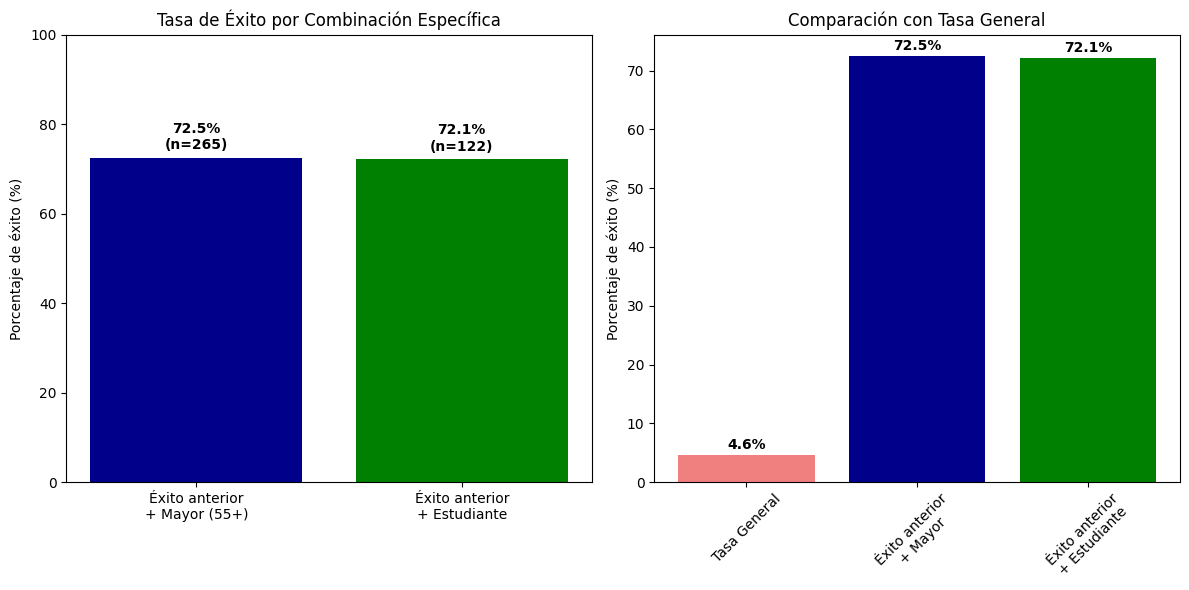


RESUMEN DE COMBINACIONES ESPECÍFICAS
🎯 Tasa general de éxito: 4.6%
🧓 Éxito anterior + Mayor (55+): 72.5% (n=265)
🎓 Éxito anterior + Estudiante: 72.1% (n=122)

RESUMEN DE COMBINACIONES ESPECÍFICAS
🎯 Tasa general de éxito: 11.3%
🧓 Éxito anterior + Mayor (55+): 72.5% (n=265)
🎓 Éxito anterior + Estudiante: 72.1% (n=122)
📈 La combinación 1 es 61.2 puntos mejor que la media
📈 La combinación 2 es 60.9 puntos mejor que la media


In [33]:
# COMBINACIÓN 2: Campañas anteriores exitosas + Estudiante  
print("\n🎓 COMBINACIÓN 2: Éxito anterior + Estudiante")

# Verificar cuántos son estudiantes
estudiantes = banco_visual[banco_visual['job'] == 'student']
print(f"Total estudiantes: {len(estudiantes)}")

exito_anterior_estudiante = banco_visual[
    (banco_visual['poutcome'] == 'SUCCESS') & 
    (banco_visual['job'] == 'student')
]

total_exito_anterior_estudiante = len(exito_anterior_estudiante)
exitos_combinacion_2 = exito_anterior_estudiante['exito'].sum() if total_exito_anterior_estudiante > 0 else 0
tasa_exito_combinacion_2 = (exitos_combinacion_2 / total_exito_anterior_estudiante * 100) if total_exito_anterior_estudiante > 0 else 0

print(f"📊 Personas con éxito anterior + estudiantes: {total_exito_anterior_estudiante}")
print(f"✅ De esas, cuántas dijeron SÍ: {exitos_combinacion_2}")
print(f"🎯 Tasa de éxito: {tasa_exito_combinacion_2:.1f}%")

# Solo crear gráficos si hay datos
if total_exito_anterior_mayor > 0 or total_exito_anterior_estudiante > 0:
    # GRÁFICO COMPARATIVO DE LAS COMBINACIONES
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    # Gráfico de barras para ambas combinaciones
    combinaciones = ['Éxito anterior\n+ Mayor (55+)', 'Éxito anterior\n+ Estudiante']
    tasas_combinaciones = [tasa_exito_combinacion_1, tasa_exito_combinacion_2]
    totales = [total_exito_anterior_mayor, total_exito_anterior_estudiante]

    bars = plt.bar(combinaciones, tasas_combinaciones, color=['darkblue', 'green'])
    plt.title('Tasa de Éxito por Combinación Específica')
    plt.ylabel('Porcentaje de éxito (%)')
    plt.ylim(0, 100)

    # Añadir porcentajes y totales
    for i, (bar, tasa, total) in enumerate(zip(bars, tasas_combinaciones, totales)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                 f'{tasa:.1f}%\n(n={total})', ha='center', fontweight='bold')

    plt.subplot(1, 2, 2)
# Comparar con la tasa general
    tasa_general = datos_combinados_visual['exito'].mean() * 100
    categorias = ['Tasa General', 'Éxito anterior\n+ Mayor', 'Éxito anterior\n+ Estudiante']
    valores = [tasa_general, tasa_exito_combinacion_1, tasa_exito_combinacion_2]

    bars = plt.bar(categorias, valores, color=['lightcoral', 'darkblue', 'green'])
    plt.title('Comparación con Tasa General')
    plt.ylabel('Porcentaje de éxito (%)')
    plt.xticks(rotation=45)

    # Añadir valores
    for bar, valor in zip(bars, valores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{valor:.1f}%', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No hay suficientes datos para crear gráficos de combinaciones")

# RESUMEN DE COMBINACIONES
print("\n" + "="*60)
print("RESUMEN DE COMBINACIONES ESPECÍFICAS")
print("="*60)
tasa_general = datos_combinados_visual['exito'].mean() * 100
print(f"🎯 Tasa general de éxito: {tasa_general:.1f}%")
print(f"🧓 Éxito anterior + Mayor (55+): {tasa_exito_combinacion_1:.1f}% (n={total_exito_anterior_mayor})")
print(f"🎓 Éxito anterior + Estudiante: {tasa_exito_combinacion_2:.1f}% (n={total_exito_anterior_estudiante})")

# RESUMEN DE COMBINACIONES
print("\n" + "="*60)
print("RESUMEN DE COMBINACIONES ESPECÍFICAS")
print("="*60)
tasa_general = banco_visual['exito'].mean() * 100
print(f"🎯 Tasa general de éxito: {tasa_general:.1f}%")
print(f"🧓 Éxito anterior + Mayor (55+): {tasa_exito_combinacion_1:.1f}% (n={total_exito_anterior_mayor})")
print(f"🎓 Éxito anterior + Estudiante: {tasa_exito_combinacion_2:.1f}% (n={total_exito_anterior_estudiante})")

if total_exito_anterior_mayor == 0 and total_exito_anterior_estudiante == 0:
    print("⚠️ No se encontraron combinaciones específicas. Verifica los valores de 'poutcome'.")
else:
    if tasa_exito_combinacion_1 > tasa_general and total_exito_anterior_mayor > 0:
        mejora_1 = tasa_exito_combinacion_1 - tasa_general
        print(f"📈 La combinación 1 es {mejora_1:.1f} puntos mejor que la media")
    if tasa_exito_combinacion_2 > tasa_general and total_exito_anterior_estudiante > 0:
        mejora_2 = tasa_exito_combinacion_2 - tasa_general  
        print(f"📈 La combinación 2 es {mejora_2:.1f} puntos mejor que la media")
